In [1]:
import numpy as np
import pandas as pd
import scipy
from scipy import stats
import matplotlib.pyplot as plt

from collections import Counter



ModuleNotFoundError: No module named 'scipy'

In [34]:
df=pd.read_excel('CDAC_DataBook.xlsx',sheet_name='faithful')
df

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85
...,...,...
267,4.117,81
268,2.150,46
269,4.417,90
270,1.817,46


In [35]:
erupt=df['eruptions']

In [36]:
erupt.mean()

np.float64(3.4877830882352936)

In [37]:
sum(erupt)/len(erupt)

3.487783088235294

In [38]:
np.sort(erupt)[135]

np.float64(4.0)

In [39]:
np.sort(erupt)[136]

np.float64(4.0)

In [40]:
np.array([4,5,6,7,8,9])

array([4, 5, 6, 7, 8, 9])

In [41]:
rf_df=pd.DataFrame({'Num':np.array([4,5,6,7,8,9]),'Freq':(np.array([20,35,42,38,17,10]))})
rf_df

,Num,Freq
0,4,20
1,5,35
2,6,42
3,7,38
4,8,17
5,9,10


In [42]:
print('Weighted mean=',sum(rf_df['Num']*rf_df['Freq'])/sum(rf_df['Freq']))

Weighted mean= 6.166666666666667


In [43]:
# wtd_mean=sum(num*freq)/sum(freq)

In [44]:
sum(np.array([4,5,6,7,8,9])*np.array([20,35,42,38,17,10]))/sum(np.array([20,35,42,38,17,10]))

np.float64(6.166666666666667)

In [45]:
r1=np.repeat(np.array([1,2,3]),[4,5,6])
r1

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3])

In [46]:
r1.mean()


np.float64(2.1333333333333333)

In [47]:
#generally if mean is nearly equal to trimmed mean then we do not have a lot of outliers 

In [85]:
#On erupt
srt_erpt=np.sort(erupt)
srt_erpt

trmd=srt_erpt[15:len(srt_erpt)-15]
trmd

array([1.8  , 1.817, 1.817, 1.817, 1.833, 1.833, 1.833, 1.833, 1.833,
       1.833, 1.833, 1.85 , 1.85 , 1.867, 1.867, 1.867, 1.867, 1.867,
       1.867, 1.867, 1.867, 1.883, 1.883, 1.883, 1.883, 1.917, 1.917,
       1.933, 1.933, 1.95 , 1.967, 1.967, 1.967, 1.983, 1.983, 1.983,
       2.   , 2.   , 2.   , 2.   , 2.017, 2.017, 2.017, 2.033, 2.033,
       2.067, 2.083, 2.083, 2.1  , 2.1  , 2.1  , 2.133, 2.15 , 2.167,
       2.167, 2.183, 2.2  , 2.2  , 2.2  , 2.217, 2.233, 2.233, 2.25 ,
       2.25 , 2.267, 2.283, 2.3  , 2.317, 2.333, 2.35 , 2.367, 2.383,
       2.4  , 2.4  , 2.417, 2.417, 2.483, 2.617, 2.633, 2.8  , 2.883,
       2.9  , 3.067, 3.317, 3.333, 3.333, 3.367, 3.417, 3.45 , 3.5  ,
       3.5  , 3.567, 3.567, 3.6  , 3.6  , 3.6  , 3.6  , 3.683, 3.717,
       3.733, 3.75 , 3.767, 3.767, 3.817, 3.833, 3.833, 3.833, 3.833,
       3.833, 3.85 , 3.85 , 3.883, 3.917, 3.917, 3.917, 3.95 , 3.95 ,
       3.966, 3.967, 4.   , 4.   , 4.   , 4.   , 4.   , 4.   , 4.033,
       4.033, 4.05 ,

In [86]:
len(srt_erpt)

272

In [87]:
np.mean(trmd)

np.float64(3.5069380165289257)

In [88]:
np.mean(srt_erpt)

np.float64(3.487783088235294)

In [84]:
print(trmd)

242


In [81]:
print(srt_erpt)

[1.6   1.667 1.7   1.733 1.75  1.75  1.75  1.75  1.75  1.75  1.783 1.783
 1.8   1.8   1.8   1.8   1.817 1.817 1.817 1.833 1.833 1.833 1.833 1.833
 1.833 1.833 1.85  1.85  1.867 1.867 1.867 1.867 1.867 1.867 1.867 1.867
 1.883 1.883 1.883 1.883 1.917 1.917 1.933 1.933 1.95  1.967 1.967 1.967
 1.983 1.983 1.983 2.    2.    2.    2.    2.017 2.017 2.017 2.033 2.033
 2.067 2.083 2.083 2.1   2.1   2.1   2.133 2.15  2.167 2.167 2.183 2.2
 2.2   2.2   2.217 2.233 2.233 2.25  2.25  2.267 2.283 2.3   2.317 2.333
 2.35  2.367 2.383 2.4   2.4   2.417 2.417 2.483 2.617 2.633 2.8   2.883
 2.9   3.067 3.317 3.333 3.333 3.367 3.417 3.45  3.5   3.5   3.567 3.567
 3.6   3.6   3.6   3.6   3.683 3.717 3.733 3.75  3.767 3.767 3.817 3.833
 3.833 3.833 3.833 3.833 3.85  3.85  3.883 3.917 3.917 3.917 3.95  3.95
 3.966 3.967 4.    4.    4.    4.    4.    4.    4.033 4.033 4.05  4.067
 4.067 4.083 4.083 4.083 4.083 4.083 4.1   4.1   4.117 4.117 4.133 4.133
 4.15  4.15  4.15  4.15  4.167 4.167 4.167 4.167 4.183

In [48]:
cts=Counter(erupt)

In [51]:
cts.most_common()

[(1.867, 8),
 (4.5, 8),
 (1.833, 7),
 (4.7, 6),
 (1.75, 6),
 (4.8, 6),
 (4.0, 6),
 (4.533, 5),
 (4.083, 5),
 (3.833, 5),
 (4.333, 5),
 (3.6, 4),
 (1.8, 4),
 (4.35, 4),
 (4.25, 4),
 (1.883, 4),
 (2.0, 4),
 (4.167, 4),
 (4.417, 4),
 (4.6, 4),
 (4.15, 4),
 (4.583, 4),
 (3.917, 3),
 (1.967, 3),
 (2.017, 3),
 (4.567, 3),
 (2.1, 3),
 (4.633, 3),
 (1.817, 3),
 (1.983, 3),
 (4.933, 3),
 (2.2, 3),
 (4.367, 3),
 (4.233, 3),
 (4.45, 3),
 (3.333, 2),
 (2.167, 2),
 (3.85, 2),
 (4.433, 2),
 (4.3, 2),
 (4.467, 2),
 (4.033, 2),
 (4.833, 2),
 (2.233, 2),
 (4.133, 2),
 (4.1, 2),
 (4.067, 2),
 (3.95, 2),
 (4.817, 2),
 (4.667, 2),
 (4.9, 2),
 (1.783, 2),
 (3.767, 2),
 (1.917, 2),
 (2.033, 2),
 (2.4, 2),
 (3.567, 2),
 (3.5, 2),
 (1.933, 2),
 (2.083, 2),
 (2.417, 2),
 (2.25, 2),
 (4.267, 2),
 (4.117, 2),
 (1.85, 2),
 (4.283, 2),
 (2.283, 1),
 (2.883, 1),
 (1.95, 1),
 (4.2, 1),
 (1.6, 1),
 (3.45, 1),
 (3.067, 1),
 (3.367, 1),
 (4.783, 1),
 (3.317, 1),
 (4.716, 1),
 (1.733, 1),
 (4.883, 1),
 (3.717, 1),
 (1.6

# Measures of dispersion-

1) Range
=Max(data)-min(data)

In [95]:
np.round(max(erupt)-min(erupt),2)

np.float64(3.5)

In [96]:
np.ptp(erupt)  #command for range - 

np.float64(3.4999999999999996)

In [98]:
round(np.ptp(erupt),2)  #peak to peak

np.float64(3.5)

2) Interquartile Range - IQR - is the difference between the 75th percentile(3rd quartile) and the 25th percentile(1st quartile)

=Q3-Q1

-Q3=75th percentile value

For percentile sort the values first**

For percentile we generally divide the dataset into 4 parts
3rd part is 3rd quartile and the 75th percentile. 
It means that 75% values are below that value mark.

If we have 20 students then 
-


nth percentile value-
it means that n percent of people are below that value.




Kth percentile formula- 
P=(k/100)*(n+1)

In [123]:
srt_erpt[135]

np.float64(4.0)

In [124]:
srt_erpt[136]

np.float64(4.0)

In [119]:
np.percentile(erupt,50)

np.float64(4.0)

In [120]:
(erupt[135]+erupt[136])/2

np.float64(3.133)

In [117]:
len(erupt)//2

136

In [141]:
np.ptp(erupt)  #range

np.float64(3.4999999999999996)

In [145]:
np.percentile(erupt,75)-np.percentile(erupt,25)   #Interquartile range

np.float64(2.2915)

In [133]:
df['srt_erpt']=srt_erpt

In [144]:
df

,eruptions,waiting,srt_erpt
0,3.600,79,1.600
1,1.800,54,1.667
2,3.333,74,1.700
3,2.283,62,1.733
4,4.533,85,1.750
...,...,...,...
267,4.117,81,4.933
268,2.150,46,5.000
269,4.417,90,5.033
270,1.817,46,5.067


# As the variation increases the value of std deviation and variance also increases.

In [150]:
x1=[10,12,15,18,20,25,10,12,15,18,20,25]


In [153]:
np.var(x1)    #population variance

np.float64(25.222222222222218)

In [154]:
np.var(x1,ddof=1)    #sample variance

np.float64(27.515151515151512)

In [155]:
np.std(x1)

np.float64(5.022173057773121)

In [160]:
np.std(x1,ddof=1)

np.float64(5.245488682206026)

# MEASURES OF SHAPE

-Skewness - peakedness

-Kurtosis - symmetry



bell shaped - normal distribution
- Mean==Median==Mode at the centre of the bell curve, Here skewness=0
- Here, skewness = 0

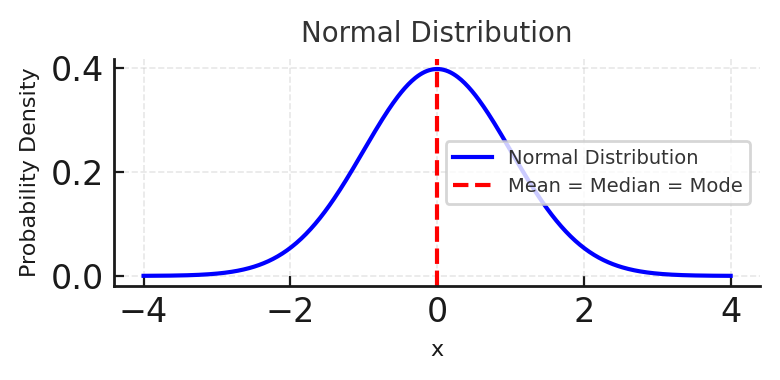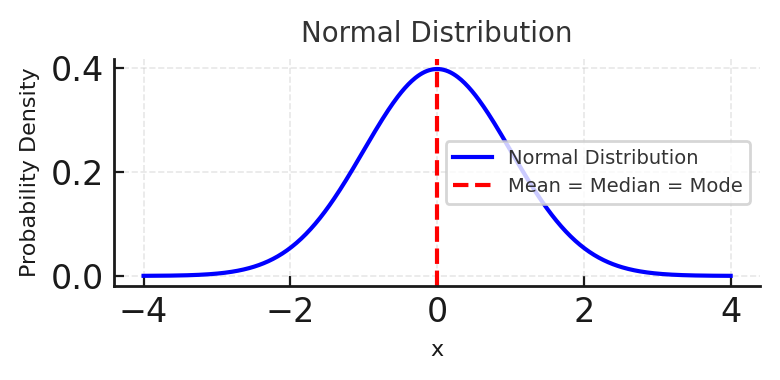

Left skewed curve , skewness= -ve

Right Skewed curve, skewness=+ve


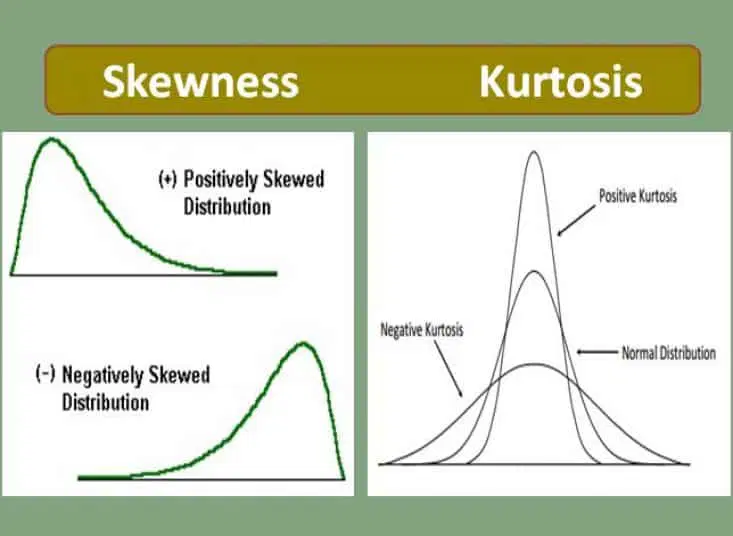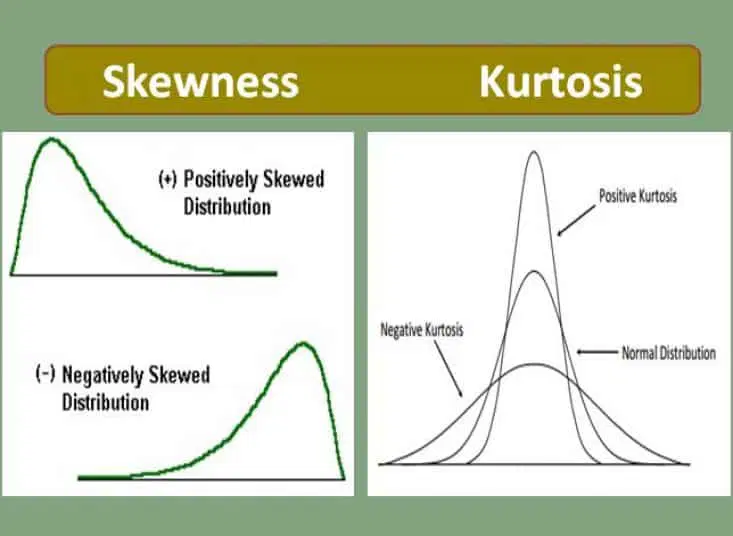